In [14]:
import os
import sys
import copy
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
from sklearn import linear_model

In [15]:
def load_dataset():
    data = pd.read_csv('data/final_dataset_14032019.csv')
    labels = data['verdict']
    features = data.drop('verdict', axis=1)
    print("\nData dataframe shape: ", data.shape)
    return data

def get_train_test_set_manual(data):
    df_malicious = data.loc[data['verdict'] ==1]
    df_benign = data.loc[data['verdict'] ==0]

    print("\nMaclisious Shape: **", df_malicious.shape)
    print("Benign Shape: ******", df_benign.shape)

#     test_set = pd.concat([df_malicious.iloc[0:214, :], df_benign.iloc[0:11995, :]])
#     train_set = pd.concat([df_malicious.iloc[215:570, :], df_benign.iloc[11996:59975, :]])
    
    test_set = pd.concat([df_malicious.iloc[0:214, :], df_benign.iloc[0:214, :]])
    train_set = pd.concat([df_malicious.iloc[214:570, :], df_benign.iloc[214:570, :]])
    print("\nTest set Shape: ****", test_set.shape)
    print("Train set Shape: ***", train_set.shape)
    
    return [train_set, test_set]

def get_rf_classifier(X,y):
    tree = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=0)
    rf = tree.fit(X,y)
    return rf

def get_dt_classifier(X,y):
    tree = DecisionTreeClassifier(min_samples_split=50, random_state=0)
    rf = tree.fit(X,y)
    return rf

def get_accuracy_on_testset(classifier, test_x, y_test):
    predicted = classifier.predict(test_x)
    print("\n  Accuracy = ", np.mean(predicted == y_test))
    confusion_matrix_dt = metrics.confusion_matrix(y_test, predicted)
#     print("  Confusion Matrix \n", confusion_matrix_dt)
    tn, fp, fn, tp = confusion_matrix_dt.ravel()
    print("  Precision of Malicious = %s" % (tp / (tp + fp)))
    print("\n  TP= %s" % tp, "   Fp= %s" % fp, "   Fn= %s" % fn, "   Tn= %s" % tn)
    print("\n   Metrics", metrics.classification_report(y_test, predicted))
    
    plt.scatter(y_test, predicted)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")

def get_accuracy_on_testset_manual(classifier, testset):
    """ Get classifier metrics on given testset """
    test_set_temp = copy.deepcopy(testset)
    y_test = test_set_temp.pop('verdict')
    predicted = classifier.predict(test_set_temp)

    print("\n  Accuracy = {}".format(np.mean(predicted == y_test)))
    print(metrics.confusion_matrix(y_test, predicted))
    print(metrics.classification_report(y_test, predicted))

    
def get_train_test_set(data, test_percent):
    df_malicious_a = data.loc[data['verdict'] ==1]
    df_benign_a = data.loc[data['verdict'] ==0]

    print("\nMaclisious count: **", df_malicious_a.shape)
    print("Benign count: ******", df_benign_a.shape)
    
    df_malicious = copy.deepcopy(df_malicious_a)
    df_benign = copy.deepcopy(df_benign_a)
    
    mal_y = df_malicious.pop('verdict')
    mal_x = df_malicious
    ben_y = df_benign.pop('verdict')
    ben_x = df_benign
    
    mal_xTrain, mal_xTest, mal_yTrain, mal_yTest = train_test_split(mal_x, mal_y, test_size = test_percent, random_state = 0)
    ben_xTrain, ben_xTest, ben_yTrain, ben_yTest = train_test_split(ben_x, ben_y, test_size = test_percent, random_state = 0)
    
    train_dataX = pd.concat([mal_xTrain, ben_xTrain])
    train_dataY = pd.concat([mal_yTrain, ben_yTrain])
    
    test_dataX = pd.concat([mal_xTest, ben_xTest])
    test_dataY = pd.concat([mal_yTest, ben_yTest])
    
    mal_test_data = pd.concat([ben_xTrain, ben_yTrain])
    print("TrainSet Count: \t ", train_dataX.shape[0], "\t TestSet Count \t:", test_dataX.shape[0])
    return [train_dataX, train_dataY, test_dataX, test_dataY]
    


Data dataframe shape:  (60545, 28)

Maclisious count: ** (570, 28)
Benign count: ****** (59975, 28)
TrainSet Count: 	  48436 	 TestSet Count 	: 12109


/home/shahid/.local/lib/python3.6/site-packages/pandas-0.23.4-py3.6-linux-x86_64.egg/pandas/core/indexes/api.py:107: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)



**** Test Set Results **** 

  Accuracy =  0.9900074324882319
  Precision of Malicious = 0.4444444444444444

  TP= 28    Fp= 35    Fn= 86    Tn= 11960

   Metrics              precision    recall  f1-score   support

          0       0.99      1.00      0.99     11995
          1       0.44      0.25      0.32       114

avg / total       0.99      0.99      0.99     12109


 **** Train Set Results **** 


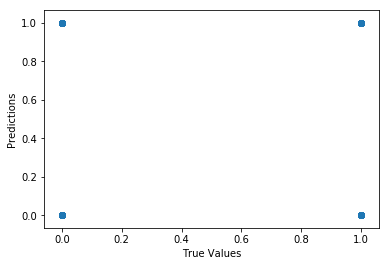

In [16]:
data = load_dataset()

trainX, trainY, testX, testY = get_train_test_set(data, 0.2)
dt_classifier = get_dt_classifier(trainX,trainY)
predicted = dt_classifier.predict(testX)
print("\n**** Test Set Results **** ")
get_accuracy_on_testset(dt_classifier, testX,testY)
print("\n **** Train Set Results **** ")
# get_accuracy_on_testset(dt_classifier, trainX, trainY)

# get_accuracy_on_testset(rf_classifier, test_set)
# get_accuracy_on_testset(rf_classifier, train_set_org)

# Manual Split Test on balanced data
# train_set, test_set = get_train_test_set_manual(data)
# y = train_set.pop('verdict')
# X = train_set
# dt_classifier = get_dt_classifier(X, y)  # type: object
# print("\n **** Accuracy on the Test Set **** ")
# get_accuracy_on_testset_manual(dt_classifier, test_set)


In [ ]:
mal_url = "http://adodereemireatesregisetreauaedeveloe.tk/eim/index.php?Email=nobody@example.com"
ben_url = "https://snxmail.slashnext.com/#1"